          PL Intensity (kcps)
Time (s)                     
5.264                   18.00
5.268                   20.00
5.272                   17.25
5.276                   12.25
5.280                    5.00


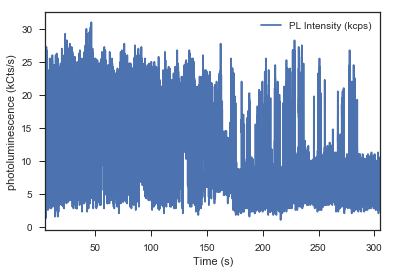

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 27 17:17:43 2018

Blinker analysis

@author: Viva Horowitz

2018-05-31
"""

# Warning: This code has skip first point of off hist for fitting.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
sns.set(style='ticks')
sns.set_context('notebook')

datafolder = 'C:\\Users\\Viva\\Documents\\data\\2018-05-31\\04-21-2018.11,00am.FIBedhBN'
filename = '02,0deg,04-21-2018.11,00am.FIBedhBN.txt'
# Just want to analyze first 150 seconds.

os.chdir(datafolder)

tname = 'Time (s)'
PLname = 'PL Intensity (kcps)'

data = pd.read_csv(filename,
                   skiprows=1,
                   header=None,
                   sep='\t',
                   names=['Time (s)','PL Intensity (kcps)'],
                   usecols=[0,1])

data = data.set_index(tname)
print(data.head())

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

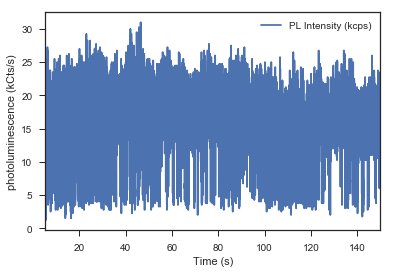

In [2]:
data = data[data.index<150]

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
plt.show()

In [3]:
print(data.max())

PL Intensity (kcps)    31.0
dtype: float64


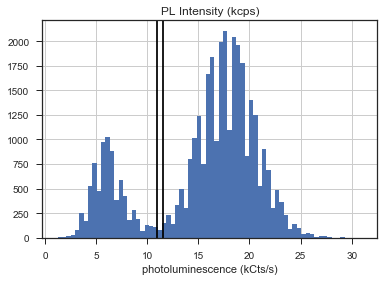

In [4]:
data.hist(bins=70)
plt.xlabel('photoluminescence (kCts/s)')
plt.locator_params(axis='x', nbins=10)
ax = plt.gca()

uthreshold = 11.5
lthreshold = uthreshold-.5

ax.axvline(x=uthreshold, color='k')
ax.axvline(x=lthreshold, color = 'k')
#ax.tick_params(axis='x',which='minor',bottom='on')
#ax.xaxis.set_minor_locator(minorLocator)
plt.show()

In [5]:
# The data was collected at a particular rate
timesetting = data.index[1]-data.index[0]
timesetting

0.0039999999999995595

In [6]:
data.head()

,PL Intensity (kcps)
Time (s),
5.264,18.00
5.268,20.00
5.272,17.25
5.276,12.25
5.280,5.00


In [7]:
data.count()

PL Intensity (kcps)    36184
dtype: int64

In [8]:
data.describe()

,PL Intensity (kcps)
count,36184.000000
mean,15.495661
std,5.386251
min,1.250000
25%,13.500000
50%,17.000000
75%,19.250000
max,31.000000


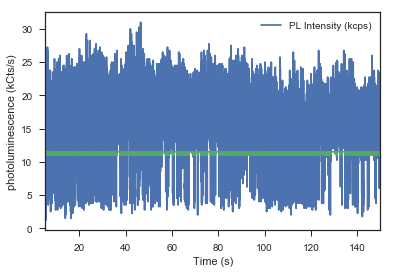

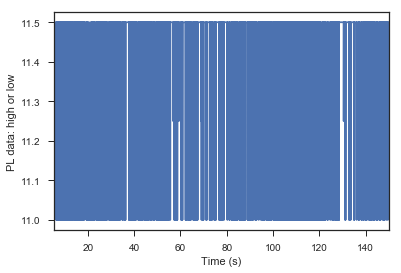

In [9]:
# Need to pick an appropriate threshold between on and off. 
# This code has an in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either. 
# This seems like the most straightforward way to deal with (rare) cases in between.
# Other options are shown.

threshdata = data[PLname].clip(upper=uthreshold, lower=lthreshold)

data.plot()
plt.ylabel('photoluminescence (kCts/s)')
threshdata.plot()

plt.figure()
threshdata.plot()
plt.ylabel('PL data: high or low')
plt.show()


In [10]:
# Main method: in between status where it won't be counted as remaining in the state 
# but it won't be counted in the other state, either.
downtimes2= threshdata[threshdata != uthreshold].index
uptimes2=threshdata[threshdata != lthreshold].index

print(uptimes2)
print(downtimes2)

Float64Index([  5.264,   5.268,   5.272,   5.276,   5.684,   5.688,   5.692,
                5.696,     5.7,   5.704,
              ...
               149.96, 149.964, 149.968, 149.972, 149.976,  149.98, 149.984,
              149.988, 149.992, 149.996],
             dtype='float64', name=u'Time (s)', length=28504)
Float64Index([   5.28,   5.284,   5.288,   5.292,   5.296,     5.3,   5.304,
                5.308,   5.312,   5.316,
              ...
               148.24, 148.668,  148.68,  149.04,   149.3, 149.644, 149.648,
              149.652, 149.656,  149.66],
             dtype='float64', name=u'Time (s)', length=7754)


In [11]:
# Alternate option (not used)
uptimes= threshdata[threshdata == uthreshold].index
downtimes=threshdata[threshdata == lthreshold].index

print(uptimes)
print(downtimes)

Float64Index([  5.264,   5.268,   5.272,   5.276,   5.684,   5.688,   5.692,
                5.696,     5.7,   5.704,
              ...
               149.96, 149.964, 149.968, 149.972, 149.976,  149.98, 149.984,
              149.988, 149.992, 149.996],
             dtype='float64', name=u'Time (s)', length=28430)
Float64Index([   5.28,   5.284,   5.288,   5.292,   5.296,     5.3,   5.304,
                5.308,   5.312,   5.316,
              ...
              148.228, 148.232, 148.236,  148.24,  149.04, 149.644, 149.648,
              149.652, 149.656,  149.66],
             dtype='float64', name=u'Time (s)', length=7680)


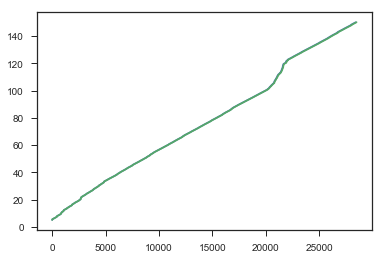

In [12]:
plt.plot(uptimes)
plt.plot(uptimes2)
plt.show()

In [13]:
uptimes[:-1]

Float64Index([  5.264,   5.268,   5.272,   5.276,   5.684,   5.688,   5.692,
                5.696,     5.7,   5.704,
              ...
              149.956,  149.96, 149.964, 149.968, 149.972, 149.976,  149.98,
              149.984, 149.988, 149.992],
             dtype='float64', name=u'Time (s)', length=28429)

In [14]:
uptimes[1:]

Float64Index([  5.268,   5.272,   5.276,   5.684,   5.688,   5.692,   5.696,
                  5.7,   5.704,   5.708,
              ...
               149.96, 149.964, 149.968, 149.972, 149.976,  149.98, 149.984,
              149.988, 149.992, 149.996],
             dtype='float64', name=u'Time (s)', length=28429)

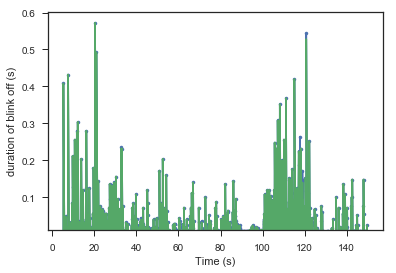

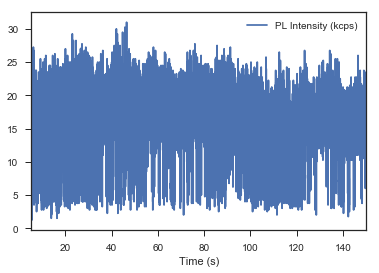

In [15]:
# We can compare the two ways of interpreting blinks.
# There is a discrepancy at about 22 seconds between the two interpretations. 
# It's a matter of whether we consider it stayed off or 
# if we consider that it came up enough to have ended the off blink and began another.
# I tend to think it ended one and began another in this case, so I'm going to use uptimesep2 as my off duration.

# subtracting each time from the last time we had the same state gives the amount of time it was not in that state.
# Therefore the separation between up times is in fact the duration of time off.
uptimesep = uptimes[1:] - uptimes[:-1]
uptimesep2 = uptimes2[1:] - uptimes2[:-1]
plt.plot(uptimes[:-1],uptimesep, '.-')
plt.plot(uptimes2[:-1],uptimesep2, '-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink off (s)')
plt.figure()
data.plot()
plt.show()

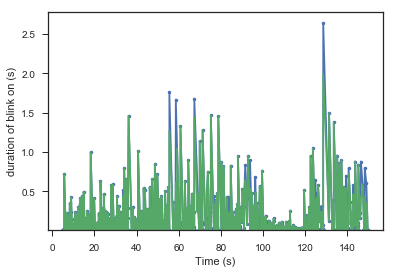

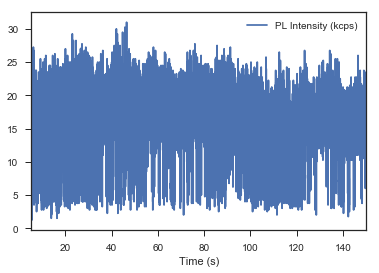

In [16]:
# We can compare the two ways of interpreting blinks. It looks like they mostly agree.

downtimesep = downtimes[1:] - downtimes[:-1]
downtimesep2 = downtimes2[1:] - downtimes2[:-1]
plt.plot(downtimes[:-1],downtimesep,'.-')
plt.plot(downtimes2[:-1],downtimesep2,'-')
plt.ylim(ymin=3*timesetting)
#plt.axis('equal')
plt.xlabel(tname)
plt.ylabel('duration of blink on (s)')
#plt.figure()
data.plot()
plt.show()

In [17]:
downtimesep2

Float64Index([           0.004,            0.004,            0.004,
                         0.004,            0.004,            0.004,
                         0.004,            0.004,            0.004,
                         0.004,
              ...
              0.00400000000002,            0.428,            0.012,
                          0.36,             0.26,            0.344,
              0.00399999999999, 0.00399999999999, 0.00400000000002,
              0.00399999999999],
             dtype='float64', name=u'Time (s)', length=7753)

In [18]:
# I chose to use downtimesep2 and uptimesep2, as detailed above.

ontimes = filter(lambda a: a > 1.5*timesetting, downtimesep2)
offtimes = filter(lambda a: a > 1.5*timesetting, uptimesep2)

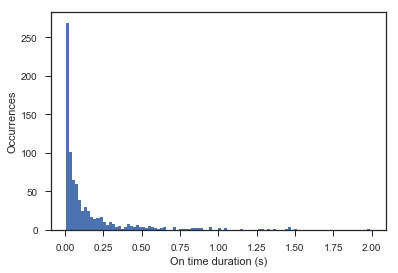

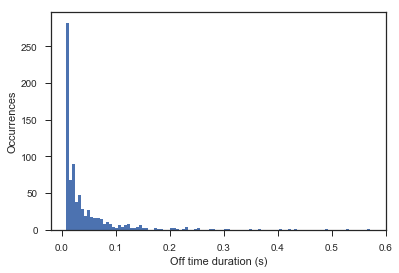

In [19]:
# Choose a nice number of bins to see how the data look.

numonbins = 100
numoffbins = 100

plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
plt.show()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
plt.show()

In [20]:
## https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547

def histc(X, bins):
    map_to_bins = np.digitize(X,bins)
    r = np.zeros(bins.shape)
    for i in map_to_bins:
        r[i-1] += 1
    return [r, map_to_bins]

In [21]:
# http://code.activestate.com/recipes/66472-frange-a-range-function-with-float-increments/
# could also use linspace

def frange(start, end=None, inc=None):
    "A range function, that does accept float increments..."

    if end == None:
        end = start + 0.0
        start = 0.0

    if inc == None:
        inc = 1.0

    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
        
    return L

In [22]:
## I decided to start my bins at 0. 
# This might be different from the built in hist function.

oninc = max(ontimes)/numonbins
onbins= frange(0,max(ontimes)+oninc*3,oninc)
#print(onbins[0:5])


offinc = max(offtimes)/numoffbins
offbins=np.linspace(0,max(offtimes),numoffbins+1)
print("linspace option (not used):")
print(offbins)
offbins= frange(0,max(offtimes),offinc)
print("frange approach:")
print(offbins)
#print(offbins[0:5])
offbins= frange(0,max(offtimes)+offinc*3,offinc)
print("frange approach and pad 3 bins to right (used):")
print(offbins)

centeredonbins = frange(oninc/2,max(ontimes)+oninc*3+oninc/2,oninc)
centeredoffbins= frange(offinc/2,max(offtimes)+offinc*3+offinc/2,offinc)
#centeredoffbins=np.linspace(offinc/2,max(offtimes)+offinc/2,numoffbins)


print('\n')
print(onbins[-5:])
print(centeredonbins[-5:])

print("Make sure ")
print(len(centeredonbins))
print(len(onbins))
print(len(centeredoffbins))
print(len(offbins))

linspace option (not used):
[ 0.       0.00572  0.01144  0.01716  0.02288  0.0286   0.03432  0.04004
  0.04576  0.05148  0.0572   0.06292  0.06864  0.07436  0.08008  0.0858
  0.09152  0.09724  0.10296  0.10868  0.1144   0.12012  0.12584  0.13156
  0.13728  0.143    0.14872  0.15444  0.16016  0.16588  0.1716   0.17732
  0.18304  0.18876  0.19448  0.2002   0.20592  0.21164  0.21736  0.22308
  0.2288   0.23452  0.24024  0.24596  0.25168  0.2574   0.26312  0.26884
  0.27456  0.28028  0.286    0.29172  0.29744  0.30316  0.30888  0.3146
  0.32032  0.32604  0.33176  0.33748  0.3432   0.34892  0.35464  0.36036
  0.36608  0.3718   0.37752  0.38324  0.38896  0.39468  0.4004   0.40612
  0.41184  0.41756  0.42328  0.429    0.43472  0.44044  0.44616  0.45188
  0.4576   0.46332  0.46904  0.47476  0.48048  0.4862   0.49192  0.49764
  0.50336  0.50908  0.5148   0.52052  0.52624  0.53196  0.53768  0.5434
  0.54912  0.55484  0.56056  0.56628  0.572  ]
frange approach:
[0.0, 0.0057199999999999916, 0.0114

In [23]:
onhist = histc(ontimes, np.asarray(onbins))
offhist = histc(offtimes, np.asarray(offbins))

In [24]:
onhist

[array([ 206.,  130.,   81.,   54.,   45.,   35.,   30.,   28.,   15.,
          16.,   12.,   18.,   14.,    6.,   11.,    6.,    5.,    5.,
           3.,    3.,    3.,    6.,    4.,    8.,    4.,    3.,    2.,
           4.,    3.,    3.,    1.,    2.,    3.,    1.,    0.,    1.,
           2.,    1.,    1.,    1.,    0.,    2.,    2.,    2.,    1.,
           2.,    0.,    4.,    0.,    0.,    1.,    1.,    2.,    0.,
           0.,    0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           1.,    1.,    0.,    1.,    0.,    0.,    1.,    0.,    0.,
           1.,    3.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.]),
 array([ 37,   7,   5,   9,  12,   8,  11,   4,   7,   2,   1,   3,   8,
         18,  13,  22,   2,   2,   8,   4,   2,   2,   1,   1,   5,   5,
          2,  12,   2,  10,  10,   

In [25]:
offhist

[array([   0.,  183.,  167.,   48.,   80.,   29.,   46.,   19.,   13.,
          32.,    8.,   24.,   15.,    8.,   11.,    3.,    9.,    3.,
           7.,    4.,    7.,    8.,    0.,    6.,    4.,    6.,    3.,
           2.,    0.,    0.,    3.,    1.,    1.,    0.,    1.,    2.,
           2.,    1.,    0.,    1.,    4.,    0.,    0.,    1.,    3.,
           0.,    0.,    0.,    2.,    0.,    0.,    0.,    0.,    2.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,    0.,
           0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,    1.,
           0.,    1.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    1.,    0.,    0.,    0.,
           0.,    0.,    1.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    1.,    0.,    0.]),
 array([ 72,   9,   3,   3,   3,   4,   4,   2,  76,   3,   4,   4,   2,
          6,   5,   4,   2,  15,  38,   4,  22,  27,   5,  19,   8,   7,
         45,   5,   5,  17,  49,   

red data are histogram data and black data are shifted to be centered on the bin


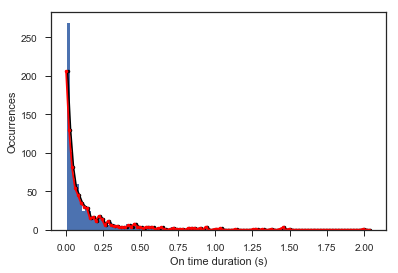

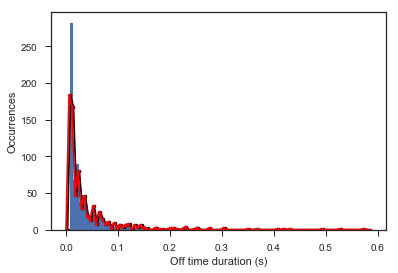

In [26]:
print("red data are histogram data and black data are shifted to be centered on the bin")

#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-k')
ax1.plot(onbins,onhist[0],'.-r')
plt.hist(ontimes, bins=numonbins)
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')

# Apparently my digitize and the hist function don't quite give the same output. 
# I think the hist command doesn't start at zero.
# Either way is probably fine.

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-k')
ax2.plot(offbins,offhist[0],'.-r')
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax2.set_yscale('symlog')
plt.show()

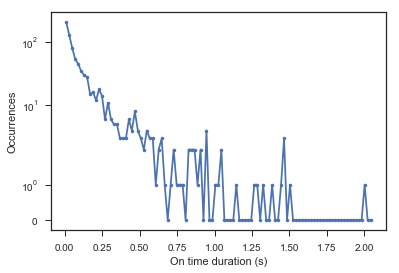

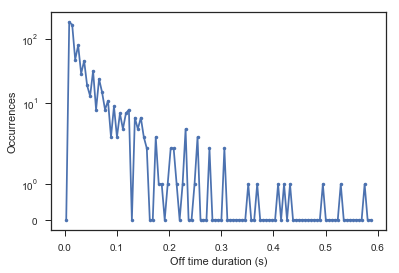

In [27]:
#fig, (ax1,ax2) = plt.subplots(2, 1, sharex=False)
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')

#plt.yscale('log')
#plt.show()
fig,ax2 = plt.subplots()
ax2.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax2.set_yscale('symlog')
plt.show()

In [28]:
from scipy.optimize import curve_fit
import scipy
scipy.__version__
# need at least version 14.0 of scipy.

'0.19.1'

In [29]:
def expfit(t, A, tau):
    return (A * np.exp(t/(-tau)))

# on time fit
onparams, onpcov = curve_fit(expfit, centeredonbins, onhist[0],p0 = (30, 0.8))
onfitx = np.linspace(min(centeredonbins),max(ontimes)+oninc*3,numonbins*5)
onfit = expfit(onfitx,onparams[0],onparams[1])

In [30]:
# Trying to find good guess
#onparams[1]=-.8
#onfit = 30 * np.exp(centeredonbins/(onparams[1]))

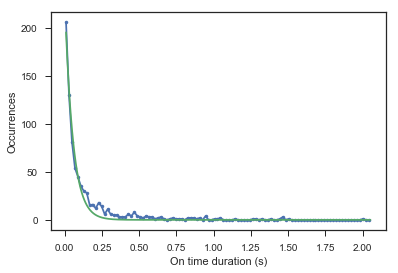

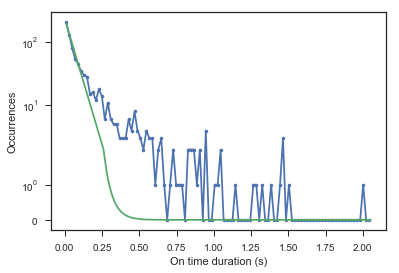

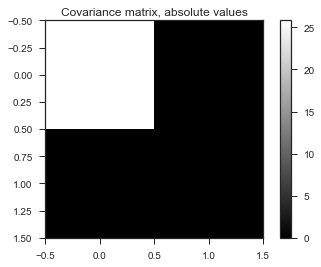

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 234.481926598 ± 5.08266329407
time constant tau = 0.0546549481066 ± 0.00165622467811


In [31]:
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'.-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.show()

plt.imshow(abs(onpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(onparams[0]) + ' ± ' + str(np.sqrt(onpcov[0,0]))
print 'time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1]))



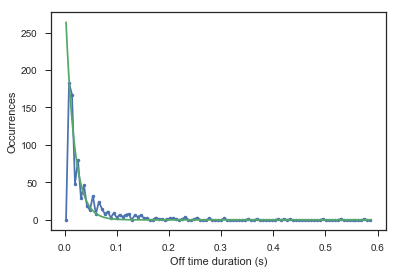

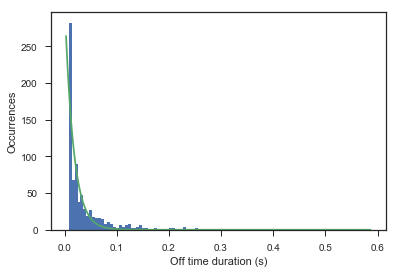

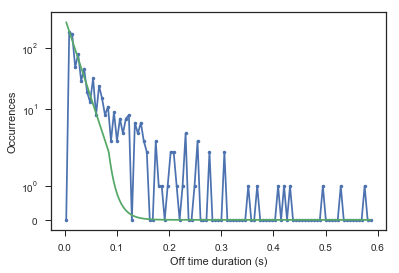

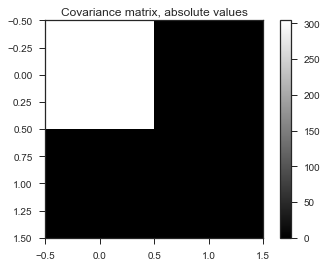

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 313.155243939 ± 17.4359640142
time constant tau = 0.0166939592764 ± 0.000937183373532 sec


In [32]:
# off time fit
# skip first point of off hist.
offparams, offpcov = curve_fit(expfit, centeredoffbins[1:], offhist[0][1:],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
plt.hist(offtimes, bins=numoffbins)
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'

Bins aligned left


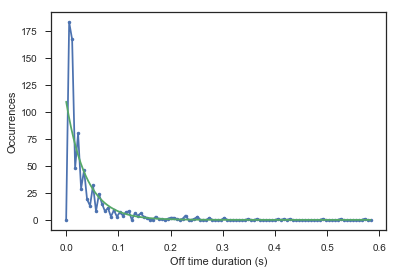

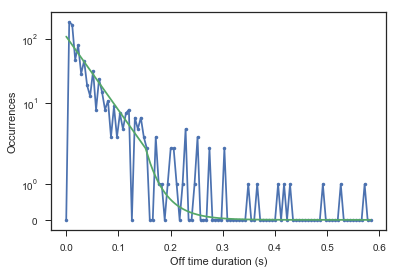

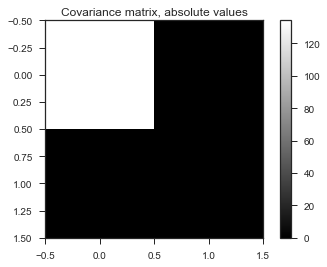

It's ok to use the uncertainties below as long as there aren't strong diagonal values.
Coefficient A = 109.444901628 ± 11.5856285047
time constant tau = 0.0380248883297 ± 0.00612484618637 sec
Bins aligned left


In [33]:
## I'm not sure whether the bins should be aligned left or center. 
# I already did centered alignment; 
# here's left alignment.
## It turns out it doesn't affect the characteristic time tau.

print('Bins aligned left')

# off time fit
offparams, offpcov = curve_fit(expfit, offbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(offbins),max(offtimes)+2.0*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# plot
fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

fig,ax1 = plt.subplots()
ax1.plot(offbins,offhist[0],'.-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.show()

plt.imshow(abs(offpcov), cmap="gray", interpolation="nearest", vmin=0)
plt.colorbar()
plt.title('Covariance matrix, absolute values')
plt.show()
print("It's ok to use the uncertainties below as long as there aren't strong diagonal values.")



print  'Coefficient A = ' + str(offparams[0]) + ' ± ' + str(np.sqrt(offpcov[0,0]))
print 'time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'
print('Bins aligned left')

off time constant tau = 0.038023226714 ± 0.00612578454704 sec
on time constant tau = 0.0546549481066 ± 0.00165622467811 sec


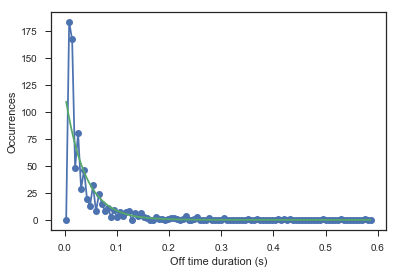

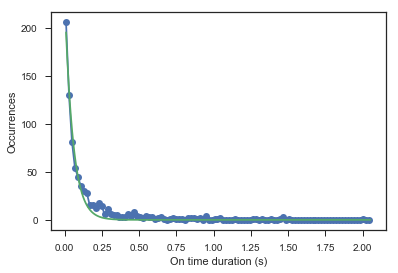

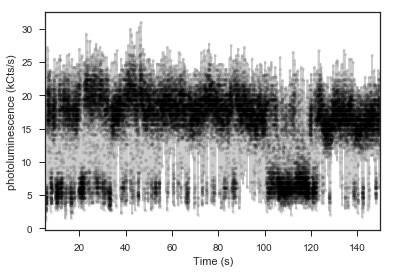

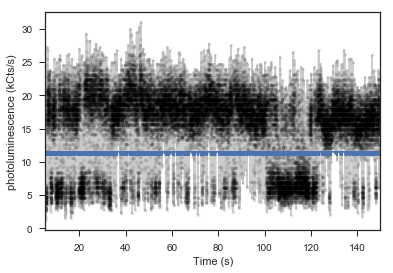

In [34]:
# Save figures

font = {'size'   : 22}

plt.rc('font', **font)

# OFF BLINKS
# off time fit
offparams, offpcov = curve_fit(expfit, centeredoffbins, offhist[0],p0 = (30, 0.8))
offfitx = np.linspace(min(centeredoffbins),max(offtimes)+2.5*offinc,numoffbins*5)
offfit = expfit(offfitx,offparams[0],offparams[1])

# display off blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredoffbins,offhist[0],'o-')
plt.xlabel('Off time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(offfitx,offfit)
plt.savefig(filename+'offblinks.pdf', bbox_inches='tight')

print 'off time constant tau = ' + str(offparams[1]) + ' ± ' + str(np.sqrt(offpcov[1,1])) + ' sec'


# On blinks
fig,ax1 = plt.subplots()
ax1.plot(centeredonbins,onhist[0],'o-')
plt.xlabel('On time duration (s)')
plt.ylabel('Occurrences')
#ax1.set_yscale('symlog')
ax1.plot(onfitx,onfit)
plt.savefig(filename+'onblinks.pdf', bbox_inches='tight')

print 'on time constant tau = ' + str(onparams[1]) + ' ± ' + str(np.sqrt(onpcov[1,1])) + ' sec'

fig1,axPL = plt.subplots()
#axPL.plot(data, 'k')
#axPL.legend.remove()
data.plot(marker='.',linestyle='None',legend=False, ax=axPL, color='k',  alpha=.1)
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.savefig(filename+'blinking.pdf', bbox_inches='tight')


fig2,axPL = plt.subplots()
data.plot(marker='.',linestyle='None',legend=False, alpha=0.1, ax=axPL, color='k')
data.plot(legend=False, alpha=0.2, ax=axPL, color='k')
threshdata.plot(legend=False)
plt.ylabel('photoluminescence (kCts/s)')
plt.xlabel(tname)

plt.savefig(filename+'blinkingandthreshold.pdf', bbox_inches='tight')

plt.show()


In [35]:
filename

'02,0deg,04-21-2018.11,00am.FIBedhBN.txt'